# Método simpléctico multipaso

## Ecuación diferencial no lineal


1. Resolver analíticamente la ecuación diferencial no lineal $$\frac{du}{dt} = u^q\qquad t \in [0,10]. $$

Suponga que $q>1$. Considere la sustitución $r = u^{1-q}$, de modo que $$ \frac{dr}{dt} = \frac{du}{dt} (1-q) u^{-q} = (1-q) u^{q}u^{-q} = (1-q).$$ Esto implica que $ r(t) = (1-q)t + C $ y entonces $$ u(t) = [(1-q)t+C]^{1/(1-q)}.$$ 

En caso que $q=1$, la solución es obvia: $$u(t) = Ce^t.$$ Para $q=0$, tendríamos $$u(t)=t + C. $$

2. Encontrar la solución numéricamente para algunos valores de q.




In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
q = [0., 0.2, 0.4, 0.7, 0.9, 1.]

In [3]:
def RK4 (f, r0, t, q):
    """
    Implementación del algoritmo de Runge-Kutta de orden 4 para ecuaciones 
    diferenciales ordinarias.

    Args:
    f: función de la ED y'=f(t,y)
    r0: condición inicial
    t: discretización uniformemente espaciada del intervalo temporal.
    """
    h = t[1]-t[0]
    y = r0
    solution = [r0]

    for i in range(1,len(t)):
        k1 = f(t[i-1],y, q)
        k2 = f(t[i-1]+0.5*h, y + 0.5*h*k1, q)
        k3 = f(t[i-1]+0.5*h, y + 0.5*h*k2, q)
        k4 = f(t[i-1]+h, y + h*k3, q)

        y += h*(k1+2*k2+2*k3+k4)/6.
        solution += [y]

    return np.array(solution)

In [4]:
t = np.linspace(0,10,1000)

In [5]:
def func(t, u, q):
    return u**q

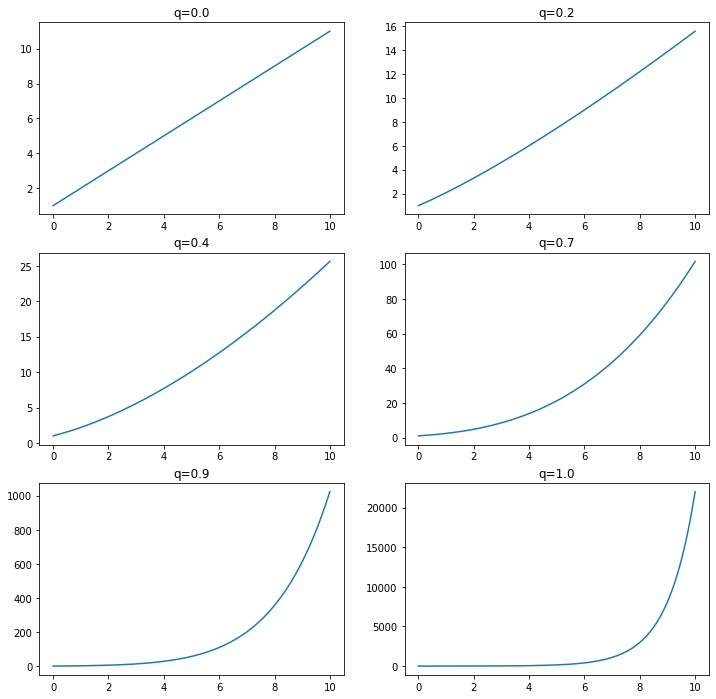

In [6]:
plt.figure(figsize=(12,12))

for i, val in enumerate(q):
    plt.subplot(3,2,i+1)
    u = RK4(func, 1., t, val)
    plt.plot(t,u)
    plt.title('q={:.1f}'.format(val))

plt.show()

## Métodos multi-paso

In [7]:
import numpy as np
import sympy as sym

In [8]:
t = sym.Symbol('t',Real=True)
h = sym.Symbol('h',Real=True)

1. Encuentre los coeficientes del método de Adams-Bashforth de tres puntos.
$$[f_n, t_n] [f_{n-1}, t_{n-1}] [f_{n-2}, t_{n-2}]$$
$$f_n =  \left( \frac{t-t_{n-1}}{t_n - t_{n-1}} \right) \left( \frac{t-t_{n-2}}{t_n - t_{n-2}} \right) $$

In [9]:
F1 = (t-(-h))*(t-(-2*h))/(2*h**2)
F2 = -(t-(0))*(t-(-2*h))/(h**2)
F3 = (t-(-h))*(t-(0))/(2*h**2)

In [10]:
I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
print(I1,I2,I3)

23*h/12 -4*h/3 5*h/12


2. Encuentre los coeficientes del método de Adams-Bashforth de cuatro puntos.
$$[f_n, t_n] [f_{n-1}, t_{n-1}] [f_{n-2}, t_{n-2}][f_{n-3}, t_{n-3}]$$
$$f_n = \left( \frac{t-t_{n-1}}{t_n - t_{n-1}} \right) \left( \frac{t-t_{n-2}}{t_n - t_{n-2}} \right) \left( \frac{t-t_{n-3}}{t_n - t_{n-3}} \right)$$

In [11]:
F1 = (t-(-h))*(t-(-2*h))*(t-(-3*h))/(6*h**3)
F2 = -(t-(0))*(t-(-2*h))*(t-(-3*h))/(2*h**3)
F3 = -(t-(0))*(t-(-2*h))*(t-(3*h))/(2*h**3)
F4 = (t-h)*(t-(2*h))*(t-(3*h))/(6*h**3)

In [12]:
I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
I4 = sym.integrate(F4, (t,0,h))
print(I1,I2,I3, I4)

55*h/24 -59*h/24 37*h/24 -3*h/8


3. Encuentre los coeficientes del método de Adams-Moulton de tres puntos.

In [13]:
F1 = (t+(h))*(t+(0))/(2*h**2)
F2 = (t+(-h))*(t+(h))/(h**2)
F3 = (t+(-h))*(t+(0))/(2*h**2)

In [14]:
I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
print(I1,I2,I3)

5*h/12 -2*h/3 -h/12


4. Encuentre los coeficientes del método de Adams-Moulton de cuatro puntos.

In [15]:
F1 = (t+(2*h))*(t+(0))*(t+(h))/(6*h**3)
F2 = -(t+(h))*(t+(2*h))*(t+(-h))/(2*h**3)
F3 = (t+(-h))*(t+(2*h))*(t-(0))/(2*h**3)
F4 = -(t+(-h))*(t+(0))*(t+(h))/(6*h**3)

In [16]:
I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
I4 = sym.integrate(F4, (t,0,h))
print(I1,I2,I3, I4)

3*h/8 19*h/24 -5*h/24 h/24


## Gravitational $ N $-body problem

In [17]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from tqdm import tqdm 
import time

In [18]:
# Definimos la clase particula
class Particle():
    
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt = t[1]-t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros((len(t),len(r0)))
        self.vVector = np.zeros((len(t),len(v0)))
        self.aVector = np.zeros((len(t),len(a0)))
        
        self.L = np.zeros(len(r0))
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        self.MomentumVector = np.zeros((len(t),len(v0)))
        self.AngularMomentumVector = np.zeros((len(t),len(v0)))
        
        self.EpVector = np.zeros((len(t),1))
        self.EkVector = np.zeros((len(t),1))
        
        
        self.Ep = 0.
        self.Force = self.m * self.a
        self.G = 4*np.pi**2
        
        self.rp = r0
        self.vp = v0
        
           
        
    def Evolution(self,i):
        
        # fill vectors
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.SetMomentum(i,self.m*self.v)
        self.SetAngularMomentum(i, self.r, self.m*self.v)
        
        
        # Energy 
        
        self.SetEk(i,self.GetKineticEnergy())
        self.SetEp(i,self.GetPotentialEnergy())
        
        # Change variables using the verlet method
        
        self.a = self.Force/self.m
        
     
        if i == 0:
            
            self.rp = self.r
            self.r = self.rp + self.dt * self.v
        
        else:
            
            self.rf = 2*self.r - self.rp + self.a * self.dt**2            
            self.v = ( self.rf - self.rp ) / (2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
        
  
            
    def ResetForce(self):
        
        self.Force[:] = 0.
        self.a[:] = 0.
        self.Ep = 0.
        
    
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v   
        
    def SetMomentum(self,i,p):
        self.MomentumVector[i] = p
        
    def SetAngularMomentum(self,i,r,p):
        
    
        self.L[0] = r[1]*p[2] - r[2]*p[1]
        self.L[1] = -(r[0]*p[2] - r[2]*p[0])
        self.L[2] = r[0]*p[1] - r[1]*p[0]
        
        self.AngularMomentumVector[i] = self.L
            
    def SetEk(self,i,Ek):
        self.EkVector[i] = Ek
    
    def SetEp(self,i,Ep):
        self.EpVector[i] = Ep

    
    # Getters
    
    def GetForce(self,p, epsilon=0.1):
        
        d = (np.linalg.norm( self.r - p.GetPosition())**2 + epsilon**2)**0.5
        
        Fn = - self.G * self.m * p.m / d**3
        
        self.Force = np.add( self.Force, Fn* (self.r - p.GetPosition())  )
        
        self.Ep += - self.G * self.m * p.m / d
                
    
    def GetPosition(self):
        return self.r
    
    def GetPositionVector(self):
        return self.rVector
    
    def GetReducePosition(self):
        return self.RrVector
        
    def GetVelocityVector(self):
        return self.vVector    
    
    def GetMomentumVector(self):
        return self.MomentumVector
    
    def GetAngularMomentumVector(self):
        return self.AngularMomentumVector
        
    def GetReduceVelocity(self):
        return self.RvVector
     
    def GetKineticEnergy(self):
        return 0.5*self.m*np.linalg.norm(self.v)**2
    
    def GetPotentialEnergy(self):
        return 0.5*self.Ep 
   
    def GetNetForce(self):
        return self.Force

    def GetR(self):
        return self.radius
  
    # Reducing size

    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]])
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
        self.RvVector = np.array([self.vVector[0]])
        
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])

In [19]:
def RandomCoordinates(dim=3):
    u = np.random.normal(0,1,dim)
    norm = np.sum(u**2)**(0.5)
    r = np.random.random()**(1./dim)
    return r*u/norm

In [20]:
def GetParticles(NParticles, t, limit=1., velo=0., Dim=3):
    
    Particles_ = []
    m = 0.01
    
    for i in range(NParticles):
        
        r0 = limit * RandomCoordinates(Dim)
        v0 = velo * RandomCoordinates(Dim)
        a0 = np.array([0.,0.,0.])
        
        p = Particle(r0, v0, a0, t, m, 0.3, i)
        
        Particles_.append(p)
        
        
    return Particles_

In [21]:
def RunSimulation(t, NParticles = 100):
    
    # Creating the particles
    Particles = GetParticles(NParticles, t)
      
    for it in tqdm(range(len(t))):
        
        for i in range(len(Particles)):    
            for j in range(len(Particles)):
                if i != j:
                    Particles[i].GetForce(Particles[j])
            
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
        
    return Particles

In [22]:
dt = 0.001
tmax = 2.
t = np.arange(0.,tmax+dt,dt)

In [23]:
Particles = RunSimulation(t)

100%|███████████████████████████████████████| 2001/2001 [12:12<00:00,  2.73it/s]


In [24]:
EnergiaK = Particles[0].EkVector
EnergiaP = Particles[0].EpVector
EnergiaTotal = Particles[0].EkVector + Particles[0].EpVector
Momentum = Particles[0].GetMomentumVector()
AngularMomentum = Particles[0].GetAngularMomentumVector()

for i in range(1,len(Particles)):
    EnergiaK = np.add(EnergiaK, Particles[i].EkVector)
    EnergiaP = np.add(EnergiaP, Particles[i].EpVector)
    EnergiaTotal = np.add(EnergiaTotal, Particles[i].EkVector + Particles[i].EpVector) 
    Momentum = np.add(Momentum, Particles[i].GetMomentumVector())
    AngularMomentum = np.add(AngularMomentum, Particles[i].GetAngularMomentumVector()) 

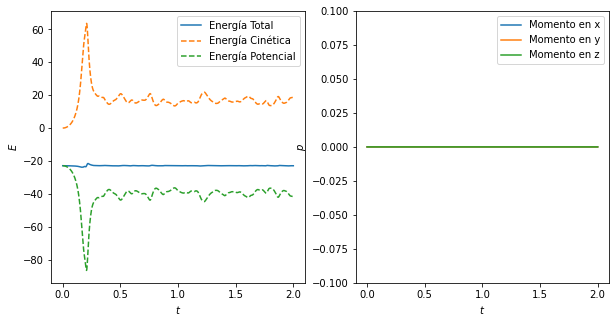

In [25]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

ax1.plot(t,EnergiaTotal, label='Energía Total')
ax1.plot(t,EnergiaK,'--',label='Energía Cinética')
ax1.plot(t,EnergiaP,'--',label='Energía Potencial')
ax1.set_xlabel(r'$t$',fontsize=10)
ax1.set_ylabel(r'$E$',fontsize=10)
ax1.legend(loc=0)


ax2.plot(t,Momentum[:,0], label='Momento en x')
ax2.plot(t,Momentum[:,1], label='Momento en y')
ax2.plot(t,Momentum[:,2], label='Momento en z')
ax2.set_xlabel(r'$t$',fontsize=10)
ax2.set_ylabel(r'$p$',fontsize=10)
ax2.legend(loc=0)
ax2.set_ylim(-0.1,0.1)

plt.show()

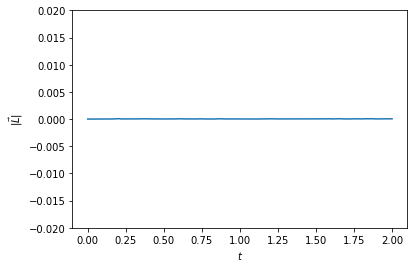

In [27]:
plt.plot(t,np.linalg.norm(AngularMomentum, axis=1))
plt.xlabel(r'$t$')
plt.ylabel(r'$|\vec{L}|$')
plt.ylim(-0.02,0.02)
plt.show()

In [28]:
def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
    
    Newt = []
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [29]:
redt = ReduceTime(t,10)

MovieWriter ffmpeg unavailable; using Pillow instead.


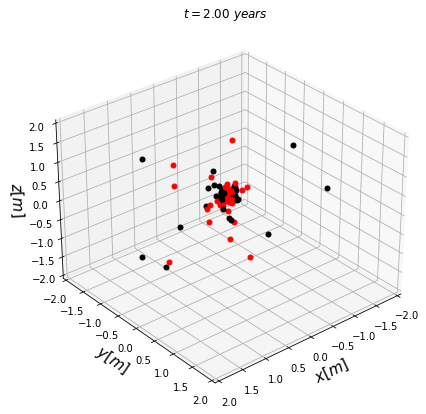

In [30]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1, projection = '3d',elev = 30, azim = 50)
    
def init():
    ax.set_xlabel(r'$x[m]$',fontsize=15)
    ax.set_ylabel(r'$y[m]$',fontsize=15)
    ax.set_zlabel(r'$z[m]$',fontsize=15)
    ax.set_xlim(-2.,2.)
    ax.set_ylim(-2.,2.)
    ax.set_zlim(-2.,2.)

colors = ['k','r']

def Update(i):
    
    plot = ax.clear()
    init()
    
    
    for n, p in enumerate(Particles):
        
        x = p.GetReducePosition()[i,0]
        y = p.GetReducePosition()[i,1]
        z = p.GetReducePosition()[i,2]
        
        vx = p.GetReduceVelocity()[i,0]
        vy = p.GetReduceVelocity()[i,1]
        vz = p.GetReduceVelocity()[i,2]
        
        plot = ax.set_title(r'$t=%.2f \ years$' %(redt[i]))
        
        plot = ax.scatter(x,y,z,marker='.',color=colors[n%2],s=100)
        
        # plot = ax.quiver(x,y,z,vx,vy,vz,color=colors[n%2], length = 0.05, normalize=False)
            
    return plot
    
Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)
Animation.save('gravitational.gif', fps=10)

## 4th Order Symplectic Integrator

In [31]:
del t
del h

In [32]:
import numpy as np

In [33]:
def RK4 (f, r0, t):
    """
    Implementación del algoritmo de Runge-Kutta de orden 4 para resolver sistemas
    de ecuaciones diferenciales.

    Args:
    f: función de la ED y'=f(t,y)
    r0: condición inicial
    t: discretización uniformemente espaciada del intervalo temporal.
    """
    h = t[1]-t[0]
    y = r0
    solution = np.array(r0)

    for i in range(1,len(t)):
        k1 = f(t[i-1],y)
        k2 = f(t[i-1]+0.5*h, y + 0.5*h*k1)
        k3 = f(t[i-1]+0.5*h, y + 0.5*h*k2)
        k4 = f(t[i-1]+h, y + h*k3)

        y = y+ h*(k1+2*k2+2*k3+k4)/6.
        solution = np.vstack([solution, y])

    return solution

In [34]:
def f(t,x):
    """
    t: tiempo
    x: vector de dos componentes.
    --- x[0]: posición, x
    --- x[1]: velocidad, v
    """
    return np.array([x[1],-x[0]])

In [35]:
t = np.linspace(0,10)
r0 = np.array([1,0])
sol = RK4(f, r0, t)

In [36]:
def calculateEnergy(x,v):
    return 0.5*(np.power(x,2)+np.power(v,2))

Text(0, 0.5, 'E[J]')

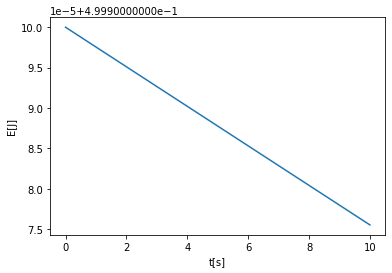

In [37]:
E = calculateEnergy(sol[:,0],sol[:,1])
plt.plot(t,E)
plt.xlabel('t[s]')
plt.ylabel('E[J]')